In [1]:
import pandas_datareader as pdr
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pdr.get_data_yahoo('TCS.NS',start='2016-01-01',end='2020-12-31')

In [3]:
test_data=pdr.get_data_yahoo('TCS.NS',start='2021-01-01',end='2021-12-31')

In [4]:
train=list(df[:]['Close'])
test=list(test_data[:]['Close'])

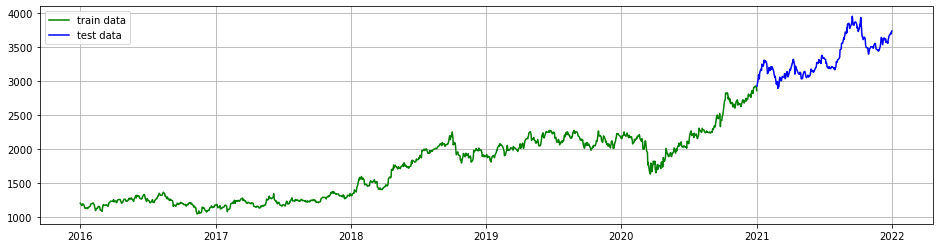

In [5]:
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot(df[:]['Close'],'green',label='train data')
plt.plot(test_data[:]['Close'],'blue',label='test data')
plt.legend()

p,d,q calculation

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
result=adfuller(df.Close.dropna())
print("AdY statistics",result[0])
print("p-value",result[1])

AdY statistics 0.1830673168703092
p-value 0.971295739425291


d=no of differences,
p=pacf,
q=acf

In [8]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

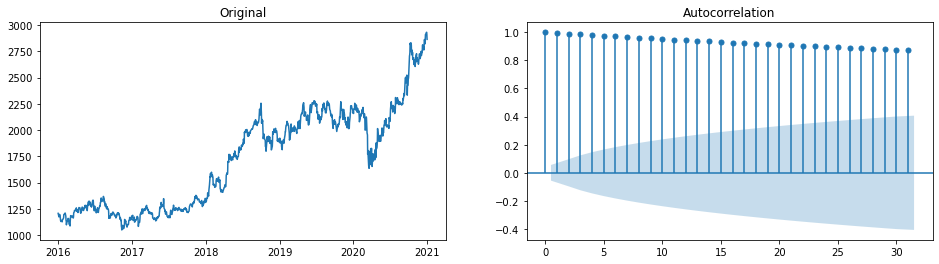

In [9]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(df.Close)
ax1.set_title("Original")
plot_acf(df.Close,ax=ax2);

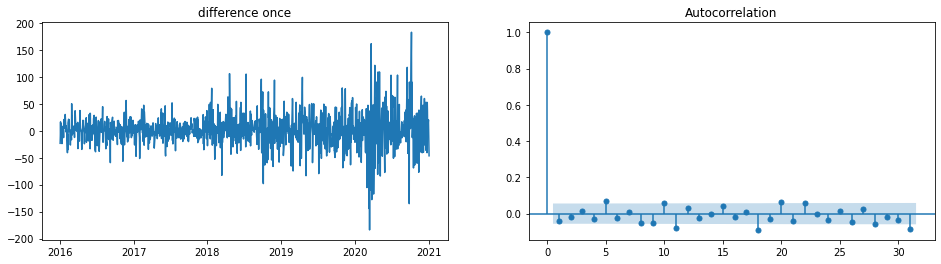

In [10]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")
plot_acf(diff,ax=ax2);

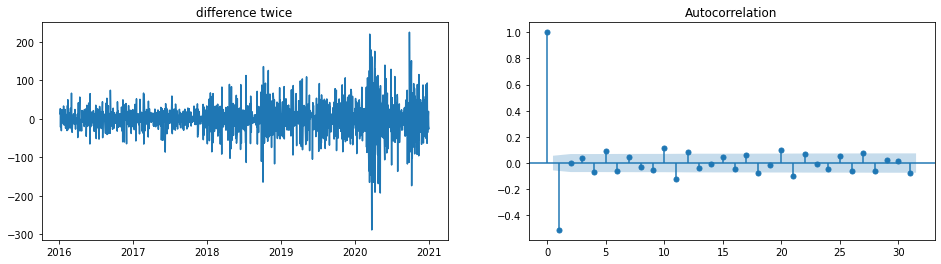

In [11]:
diff=df.Close.diff().diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference twice")
plot_acf(diff,ax=ax2);

inbuild library to find d value

In [12]:
from pmdarima.arima.utils import ndiffs

In [13]:
d=df.copy()
ndiffs(d.Close,test="adf")

1

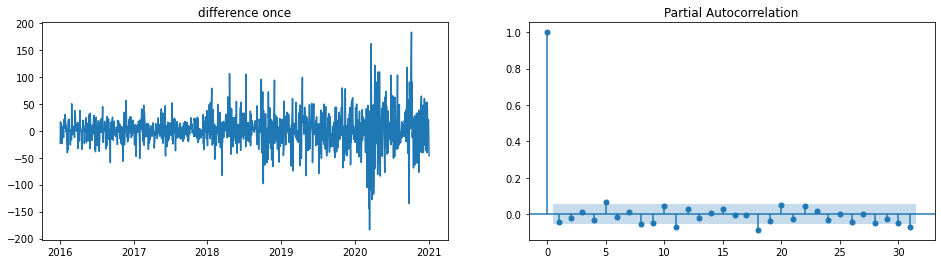

In [14]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")

plot_pacf(diff,ax=ax2);

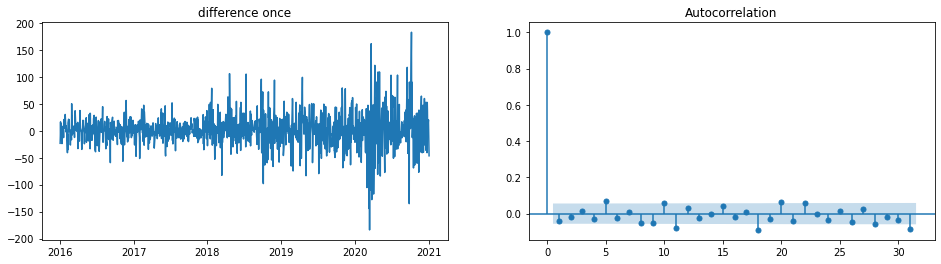

In [15]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")

plot_acf(diff,ax=ax2);

In [16]:
model_prediction=[]
n_test_obser=len(test)

In [17]:
from statsmodels.tsa.arima_model import ARIMA

In [18]:
for i in range(n_test_obser-20):
    model=ARIMA(train,order=(5,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=list(output[0])[0]
    model_prediction.append(yhat)
    actual_test_value=test[i]
    train.append(actual_test_value)
    

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [19]:
length=len(test)

In [20]:
fore=[]
for i in range(20):
    model=ARIMA(train,order=(5,1,0))
    model_fit=model.fit()
    y=model_fit.forecast()
    train.append(test[length-20+i])
    fore.append(list(y[0])[0])
    

In [21]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1480
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -7254.253
Method:                       css-mle   S.D. of innovations             32.543
Date:                Sun, 20 Mar 2022   AIC                          14522.505
Time:                        18:38:11   BIC                          14559.604
Sample:                             1   HQIC                         14536.335
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7084      0.835      2.046      0.041       0.071       3.345
ar.L1.D.y     -0.0269      0.026     -1.037      0.300      -0.078       0.024
ar.L2.D.y     -0.0482      0.026     -1.855      0.064      -0.099       0.003
ar.L3.D.y      0.0057      0.026      0.218      0.828      -0.045       0.057
ar.L4.D.y  -1.459e-05      0.026     -0.001      1.000      -0.051       0.051
ar.L5.D.y      0.0567      0.026      2.186      0.029       0.006       0.108
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4046           -1.0852j            1.7750           -0.3953
AR.2           -1.4046           +1.0852j            1.7750            0.3953
AR.3            0.4877           -1.6778j            1.7472           -0.2050
AR.4            0.4877           +1.6778j            1.7472            0.2050
AR.5            1.8341           -0.0000j            1.8341           -0.0000
-----------------------------------------------------------------------------
"""

In [22]:
len(test)

248

graph between actual predicted and forecasted


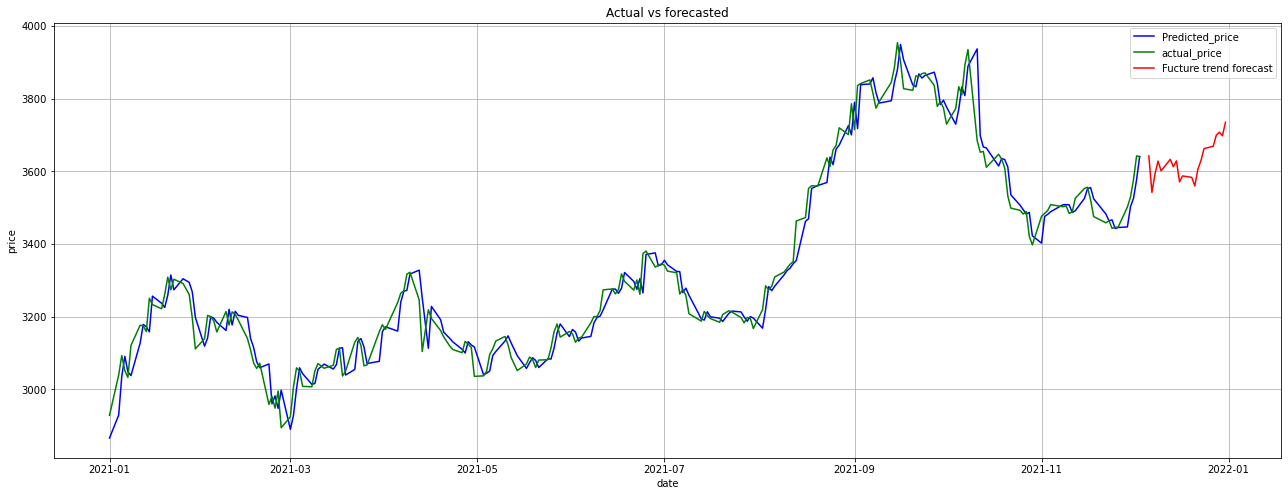

In [23]:
plt.figure(figsize=(22,8))
plt.grid(True)
data_range=test_data.index
plt.plot(data_range[:-20],model_prediction[:],color='blue',label='Predicted_price')
plt.plot(data_range[:-20],test[:-20],color='green',label='actual_price')
plt.plot(data_range[-20:],fore[:],color='red',label='Fucture trend forecast')
plt.xlabel('date')
plt.ylabel('price')
plt.title('Actual vs forecasted')
plt.legend()


actual vs forecasted for 20 days

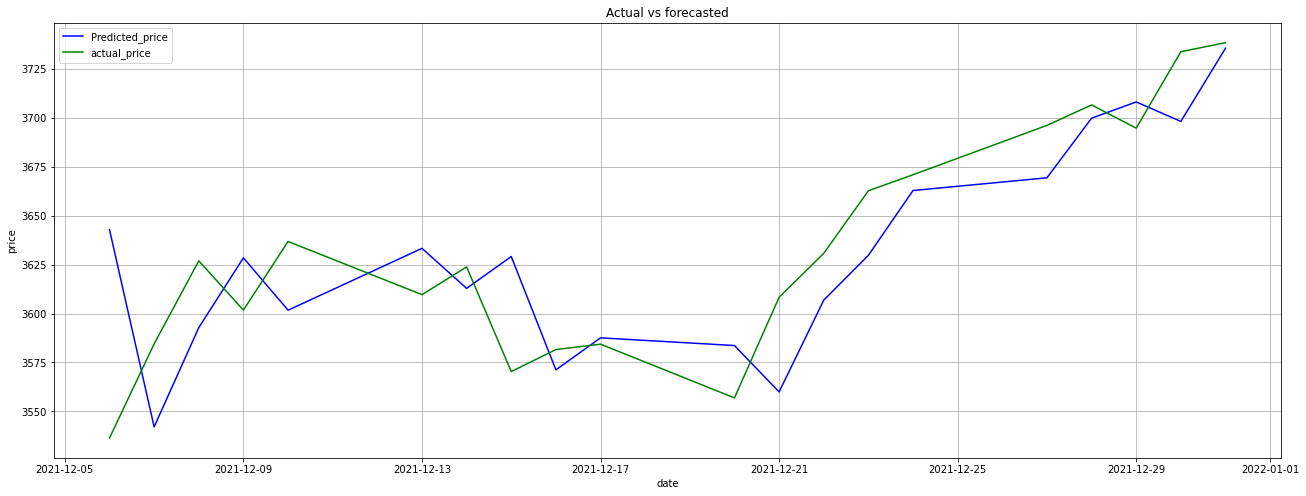

In [24]:
plt.figure(figsize=(22,8))
plt.grid(True)
data_range=test_data.index
plt.plot(data_range[-20:],fore[:],color='blue',label='Predicted_price')
plt.plot(data_range[-20:],test[-20:],color='green',label='actual_price')

plt.xlabel('date')
plt.ylabel('price')
plt.title('Actual vs forecasted')
plt.legend()


Error calculation

In [25]:
date=pd.to_datetime(data_range)

In [26]:
len(test)

248

In [27]:
dif=[]
for i in range(20):
    dif.append(test[length-20+i]-fore[i])

In [28]:
print ("{:<25} {:<25} {:<25} {:<38}".format('Date','Actual','Predicted','difference'))
for i in range(20):
   # print(test[228+i],"        ",ans[i], "        =", dif[i])
    print ("{}    {:<25} {:<25}=  {:<25}".format(data_range[length-20+i],test[length-20+i],fore[i],dif[i]))

Date                      Actual                    Predicted                 difference                            
2021-12-06 00:00:00    3536.39990234375          3642.859310070612        =  -106.45940772686208      
2021-12-07 00:00:00    3584.5                    3542.1003469196226       =  42.39965308037745        
2021-12-08 00:00:00    3626.89990234375          3592.8045468474584       =  34.09535549629163        
2021-12-09 00:00:00    3601.75                   3628.4387845439223       =  -26.68878454392234       
2021-12-10 00:00:00    3636.800048828125         3601.699668077266        =  35.10038075085913        
2021-12-13 00:00:00    3609.64990234375          3633.285614709568        =  -23.635712365818108      
2021-12-14 00:00:00    3623.800048828125         3612.8540424275707       =  10.946006400554325       
2021-12-15 00:00:00    3570.35009765625          3629.122582284789        =  -58.77248462853913       
2021-12-16 00:00:00    3581.60009765625          3571.21858

In [29]:
from sklearn.metrics import mean_squared_error
mean_squa=mean_squared_error(test[length-20:length],fore[:20])
mean_squa

1374.2412120588538

In [30]:
import math
root_mean_squa=math.sqrt(mean_squa)
root_mean_squa

37.07075952902576